In [81]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [82]:
dry_beans = pd.read_csv("Dry_Bean_Dataset.csv")
dry_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [83]:
dry_beans["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

C:\Users\singh\AppData\Local\Temp\ipykernel_14768\2116916337.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dry_beans.corr()


<Axes: >

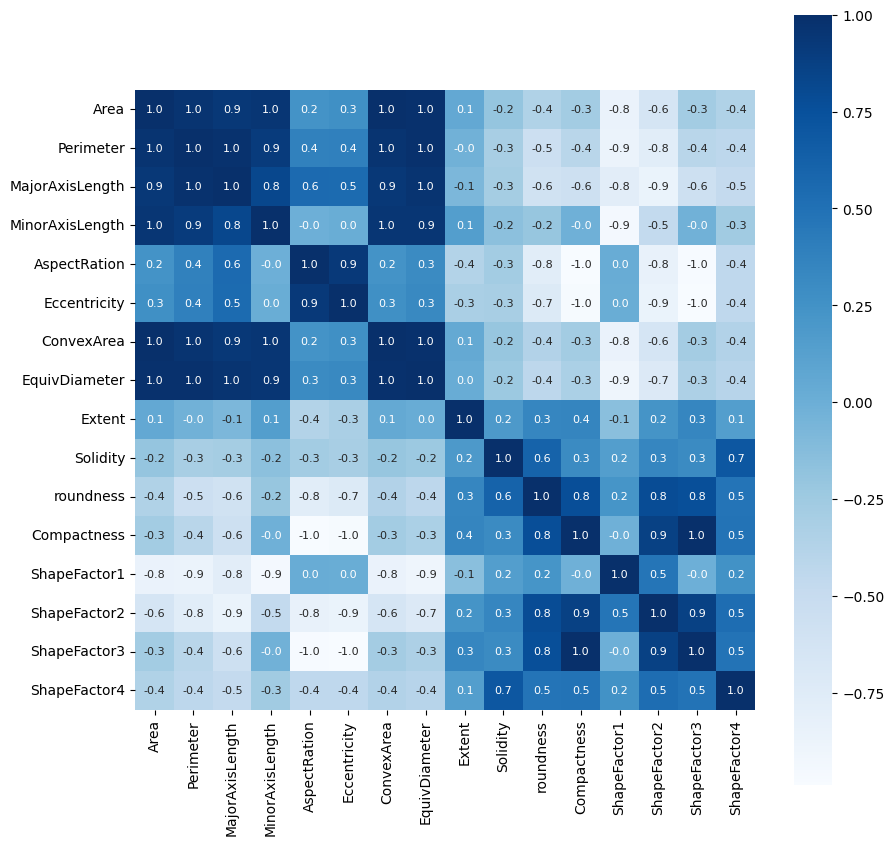

In [84]:
#corelation 
correlation = dry_beans.corr()
#heatmap of correlation 
plt.figure(figsize=(10,10))
sns.heatmap(correlation , cbar=True , square=True , fmt= '.1f' , annot = True , annot_kws ={'size':8}, cmap = 'Blues' )

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')


<Axes: xlabel='Area', ylabel='ShapeFactor1'>

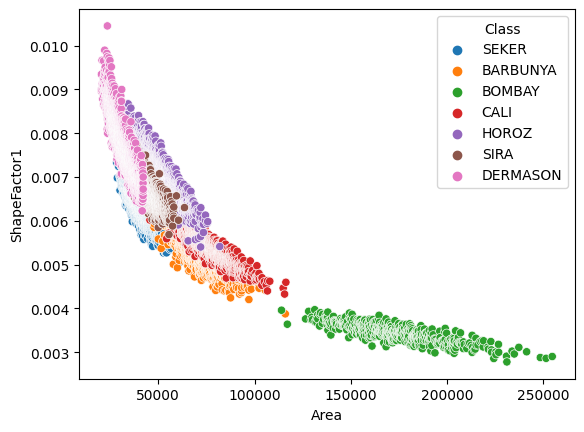

In [85]:

# Step 1: Verify column names in the 'iris' DataFrame
print(dry_beans.columns)

dry_beans['Class'] =  dry_beans['Class'].astype(str)

# Step 4: Create the scatter plot using Seaborn scatterplot function
sns.scatterplot(data=dry_beans, x='Area', y='ShapeFactor1', hue='Class')

array([[<Axes: title={'center': 'Area'}>,
        <Axes: title={'center': 'Perimeter'}>,
        <Axes: title={'center': 'MajorAxisLength'}>,
        <Axes: title={'center': 'MinorAxisLength'}>],
       [<Axes: title={'center': 'AspectRation'}>,
        <Axes: title={'center': 'Eccentricity'}>,
        <Axes: title={'center': 'ConvexArea'}>,
        <Axes: title={'center': 'EquivDiameter'}>],
       [<Axes: title={'center': 'Extent'}>,
        <Axes: title={'center': 'Solidity'}>,
        <Axes: title={'center': 'roundness'}>,
        <Axes: title={'center': 'Compactness'}>],
       [<Axes: title={'center': 'ShapeFactor1'}>,
        <Axes: title={'center': 'ShapeFactor2'}>,
        <Axes: title={'center': 'ShapeFactor3'}>,
        <Axes: title={'center': 'ShapeFactor4'}>]], dtype=object)

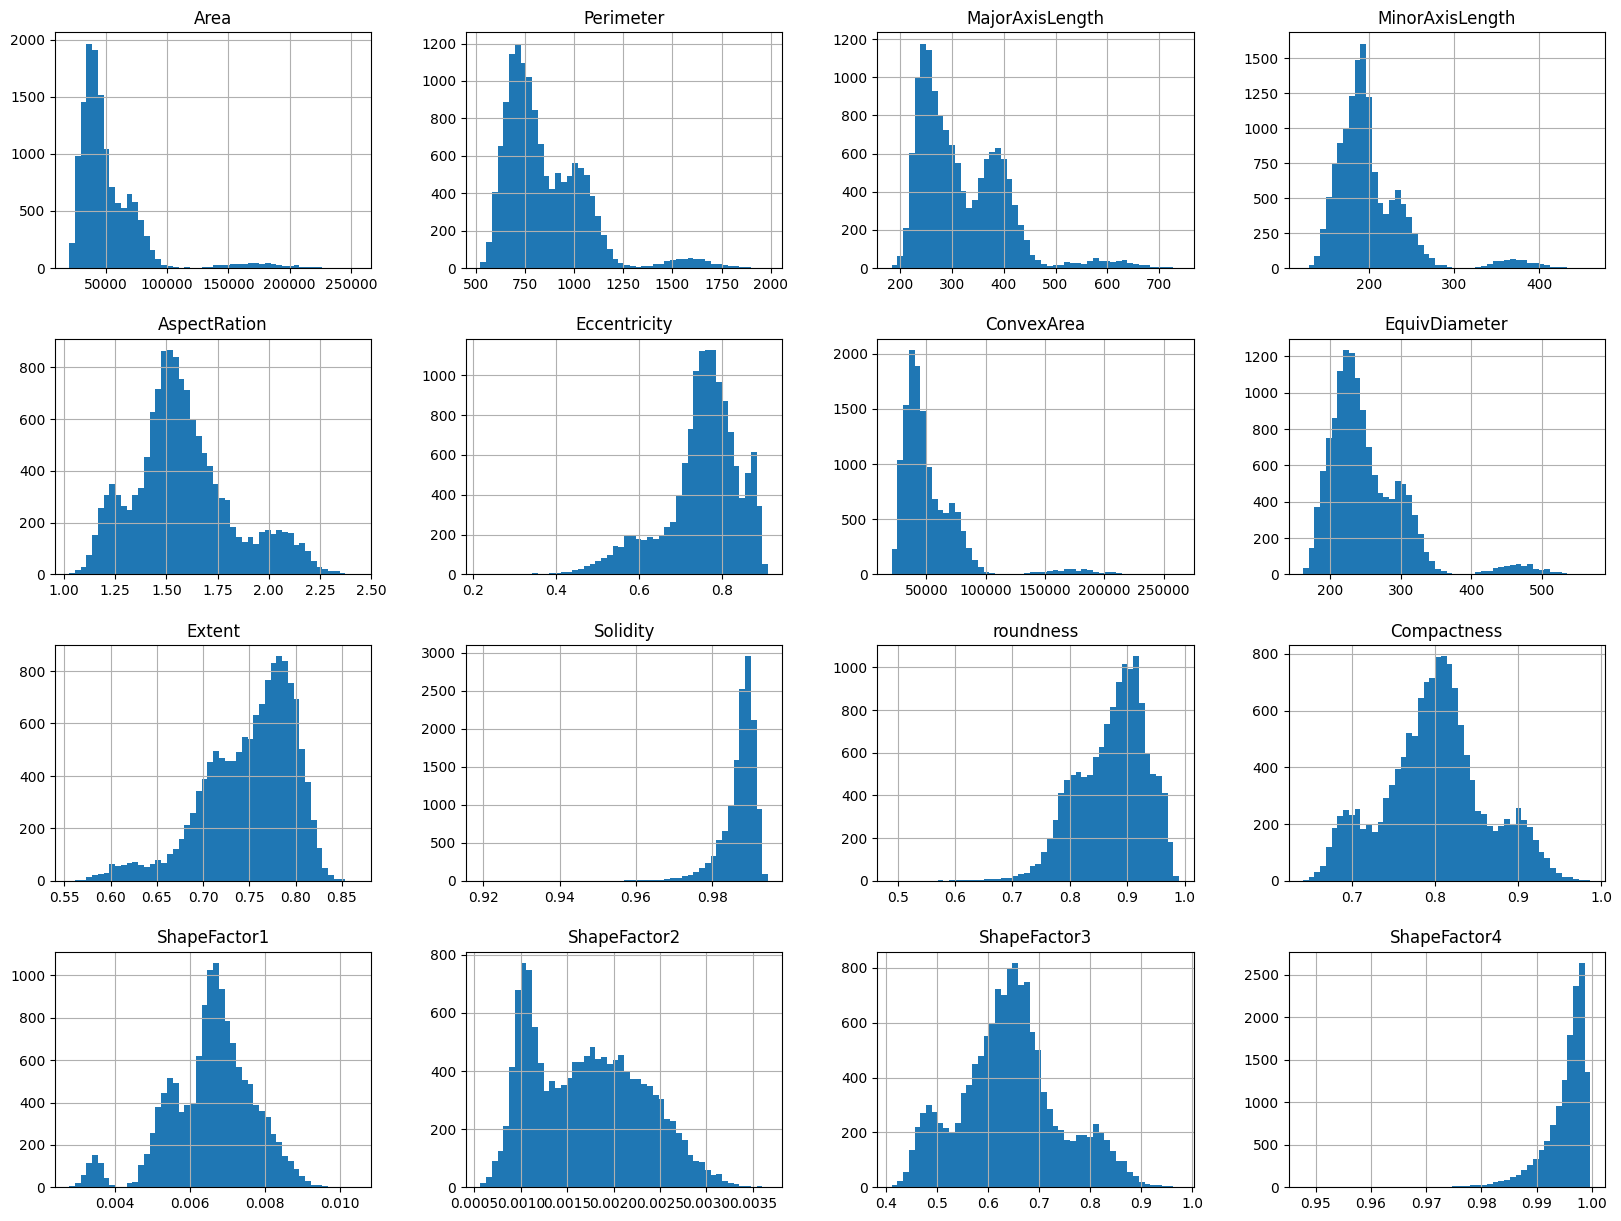

In [86]:
dry_beans.hist(bins=50, figsize=(20,15))

In [87]:
from scipy import stats

# Assuming you have loaded your dataset into a DataFrame named 'dry_beans'

# Iterate over numeric attributes
numeric_attributes = dry_beans.select_dtypes(include=['number']).columns
correlations = []

for attribute in numeric_attributes:
    # Perform ANOVA test
    f_statistic, p_value = stats.f_oneway(*[group[1] for group in dry_beans.groupby('Class')[attribute]])
    correlations.append((attribute, f_statistic, p_value))

# Sort correlations by p-value in ascending order
correlations.sort(key=lambda x: x[2])

# Display correlations
for attribute, f_statistic, p_value in correlations:
    print(f"{attribute}: F-statistic={f_statistic:.2f}, p-value={p_value:.4f}")


Area: F-statistic=29017.51, p-value=0.0000
Perimeter: F-statistic=24283.66, p-value=0.0000
MajorAxisLength: F-statistic=21622.24, p-value=0.0000
MinorAxisLength: F-statistic=22442.39, p-value=0.0000
AspectRation: F-statistic=10376.98, p-value=0.0000
Eccentricity: F-statistic=8276.74, p-value=0.0000
ConvexArea: F-statistic=28961.79, p-value=0.0000
EquivDiameter: F-statistic=25444.55, p-value=0.0000
Extent: F-statistic=422.30, p-value=0.0000
Solidity: F-statistic=631.72, p-value=0.0000
roundness: F-statistic=6156.43, p-value=0.0000
Compactness: F-statistic=10166.12, p-value=0.0000
ShapeFactor1: F-statistic=12081.32, p-value=0.0000
ShapeFactor2: F-statistic=12329.88, p-value=0.0000
ShapeFactor3: F-statistic=9900.44, p-value=0.0000
ShapeFactor4: F-statistic=1255.11, p-value=0.0000


In [88]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming 'X' contains your feature columns and 'y' contains the target variable 'Class'
# Step 1: Separate features (X) and target (y)
X = dry_beans.drop('Class', axis=1)
y = dry_beans['Class']


# Number of top features to select
k = 5

# Perform feature selection using SelectKBest and ANOVA F-statistic
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Area', 'Perimeter', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter'], dtype='object')


array([[<Axes: xlabel='Area', ylabel='Area'>,
        <Axes: xlabel='Perimeter', ylabel='Area'>,
        <Axes: xlabel='MinorAxisLength', ylabel='Area'>,
        <Axes: xlabel='ConvexArea', ylabel='Area'>,
        <Axes: xlabel='EquivDiameter', ylabel='Area'>],
       [<Axes: xlabel='Area', ylabel='Perimeter'>,
        <Axes: xlabel='Perimeter', ylabel='Perimeter'>,
        <Axes: xlabel='MinorAxisLength', ylabel='Perimeter'>,
        <Axes: xlabel='ConvexArea', ylabel='Perimeter'>,
        <Axes: xlabel='EquivDiameter', ylabel='Perimeter'>],
       [<Axes: xlabel='Area', ylabel='MinorAxisLength'>,
        <Axes: xlabel='Perimeter', ylabel='MinorAxisLength'>,
        <Axes: xlabel='MinorAxisLength', ylabel='MinorAxisLength'>,
        <Axes: xlabel='ConvexArea', ylabel='MinorAxisLength'>,
        <Axes: xlabel='EquivDiameter', ylabel='MinorAxisLength'>],
       [<Axes: xlabel='Area', ylabel='ConvexArea'>,
        <Axes: xlabel='Perimeter', ylabel='ConvexArea'>,
        <Axes: xlabel='Mi

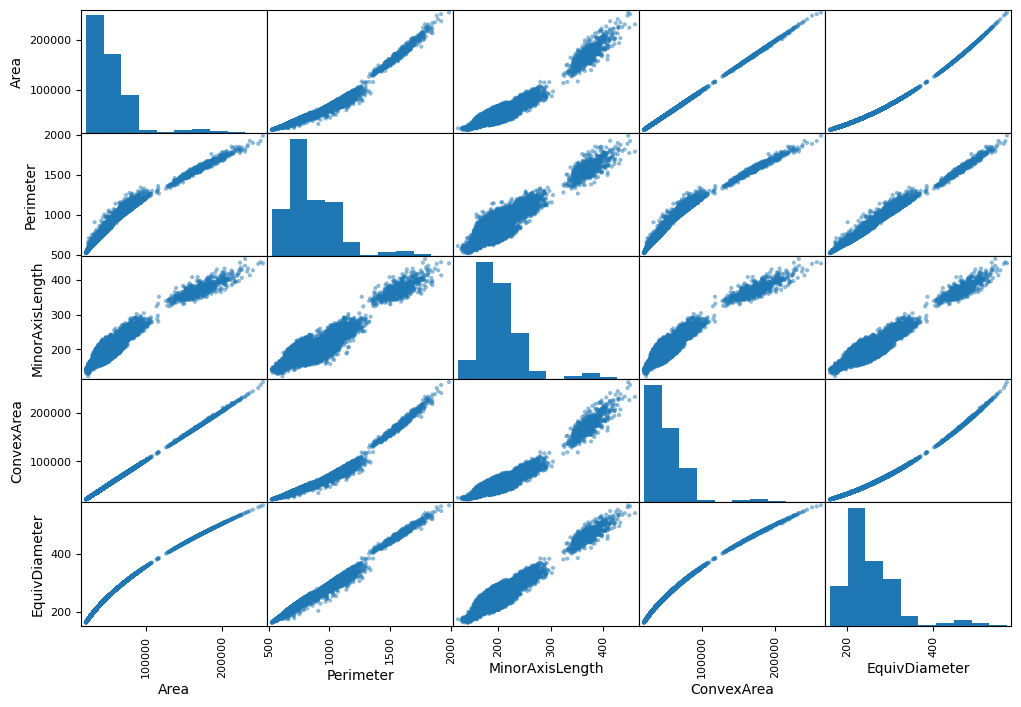

In [89]:
attributes = ['Area', 'Perimeter', 'MinorAxisLength', 'ConvexArea', 'EquivDiameter']
scatter_matrix(dry_beans[attributes] , figsize = ((12,8)))

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Choose a classification algorithm (e.g., Decision Tree)
#clf = DecisionTreeClassifier(random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Step 3: Model Training
clf.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)


Accuracy: 0.93
Confusion Matrix:
[[237   0  16   0   1   1   6]
 [  0 117   0   0   0   0   0]
 [ 14   0 298   0   3   1   1]
 [  0   0   0 619   2   4  46]
 [  1   0   9   3 389   0   6]
 [  3   0   0  13   0 388   9]
 [  0   0   1  50   5   6 474]]
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.92      0.94      0.93       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.87      0.88      0.88       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [91]:
# Sample input data for prediction
#69667,1035.546,404.8892675,222.0585678,1.823344496,0.836188132,71209,297.8301183,0.781896745,0.978345434,0.816390951,0.735584127,0.00581178,0.001049587,0.541084008,0.986582547,CALI

#32323,649.59,217.3714574,189.591319,1.146526426,0.489149967,32615,202.8667587,0.784843629,0.991047064,0.962593368,0.933272294,0.006724978,0.003147053,0.870997175,0.998621278 SEKER

#41114,803.231,339.5572132,154.6684699,2.19538742,0.890235543,41547,228.796789,0.791445291,0.989578068,0.800790058,0.673809244,0.008258919,0.001050149,0.454018897,0.996747374,HOROZ
input_data = [32323,649.59,217.3714574,189.591319,2.19538742,0.890235543,41547,228.796789,297.8301183,0.781896745,0.978345434,0.816390951,0.735584127,0.008258919,0.001050149,0.996747374]
# Convert the input data to a 2D array
input_data_array = np.array(input_data).reshape(1, -1)

# Predict quality score using the trained Linear Regression model
prediction = clf.predict(input_data_array)

print(f"Predicted Quality Score: {prediction[0]}")


Predicted Quality Score: DERMASON


c:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
